
<p>El ejercicio fue implementado en <b>Júpyter Notebook</b> Se adjunta el archivo formato csv en el repositorio para su uso</p>
<center>
<h1>Algoritmo de regresión Lineal simple</h1>
</center>
<br>
<p>El análisis de regresión lineal, en general, nos permite obtener una función lineal de una o más variables independientes o predictoras (X1, X2, ... XK) a partir de la cual explicar o predecir el valor de una variable dependiente o criterio (Y). En el análisis de regresión lineal podemos diferenciar entre análisis de regresión lineal simple y análisis de regresión lineal múltiple. En el primero, se intenta explicar o predecir la variable dependiente Y a partir de una única variable independiente, X1; mientras que en el segundo, contamos con un conjunto de variables independientes, X1, X2, ... XK, para estimar la variable dependiente Y. En ambos casos, tanto la variable dependiente como la/s independiente/s están medidas en escala de intervalo o de razón (Montgomery,Peck & Vining G.2006)</p>
<br>
<h2>Implementación del algoritmo</h2>
<br>
El algoritmo se implementa en el siguiente contexto: Se tiene un archivo con la cadena de producción de maíz a nivel municipal en Colombia. Se utilizaron los datos publicados en la siguiente Url: https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Cadena-Productiva-Ma-z-Area-Producci-n-Y-Rendimien/d968-yfb5

<p>Con base a los datos expuesto en la hectarea cosechadas de maíz se hace una predicción para saber cuantas toneladas producirá</p>



In [37]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
#Se leen los datos del archivo
data = pd.read_csv("./CadenaMaiz2.csv")

In [44]:
tamanios=[30,60]
#se designa las variables a procesar
f1 = data['Área Cosechada(ha)'].values
f2 = data['Producción(t)'].values
# Se recortan los datos en la zona donde mas se presentanlos puntos
filtered_data = data[(data['Área Cosechada(ha)'] <= 10000) & (data['Producción(t)'] <= 60000)]

f1 = filtered_data['Área Cosechada(ha)'].values
f2 = filtered_data['Producción(t)'].values  
# Se pinta con el color azul los puntos
asignar=[]
for index, row in filtered_data.iterrows():
        asignar.append('blue')
   

In [45]:
#Se asigna variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Área Cosechada(ha)"]]
X_train = np.array(dataX)
y_train = filtered_data['Producción(t)'].values

In [46]:
#objeto de Regresión Linear
regr = linear_model.LinearRegression()

#Se entra el modelo
regr.fit(X_train, y_train)

# se hacen las predicciones 
y_pred = regr.predict(X_train)

# coeficienetes obtenidos
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [ 2.87002474]
Independent term: 
 -142.446331021
Mean squared error: 1180104.41
Variance score: 0.68


<h2>Se visualiza la recta con base a lo que se obtuvo</h2>

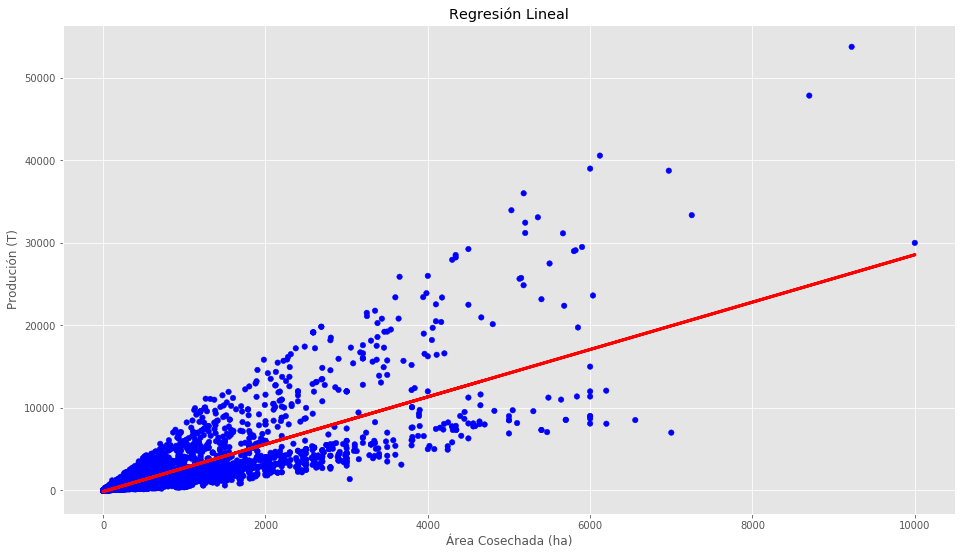

In [47]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Área Cosechada (ha)')
plt.ylabel('Produción (T)')
plt.title('Regresión Lineal')

plt.show()

In [48]:
# Se quiere predecir cuántas toneladas de producción se van a obtener por 200000 hectareas cosechadas
resultado = regr.predict([[20000]])
print(int(resultado))

57258
